# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**



```
# This is formatted as code
```

## Name: Adelina Yelemessova

## UNI: ay2513

## The Dataset


### Description

This data set contains details of ecommerce product shipment tracking and the target variable is a binary variable reflecting the fact whether the product reached on time or not.

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [84]:
## YOUR CODE HERE
# Load the dataset
data_df = pd.read_csv('data.csv')
data_df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**1.2: Are there any missing values in the dataset?**

In [85]:
# There is no missing value in the dataset
data_df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_On_Time        0
dtype: int64

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**


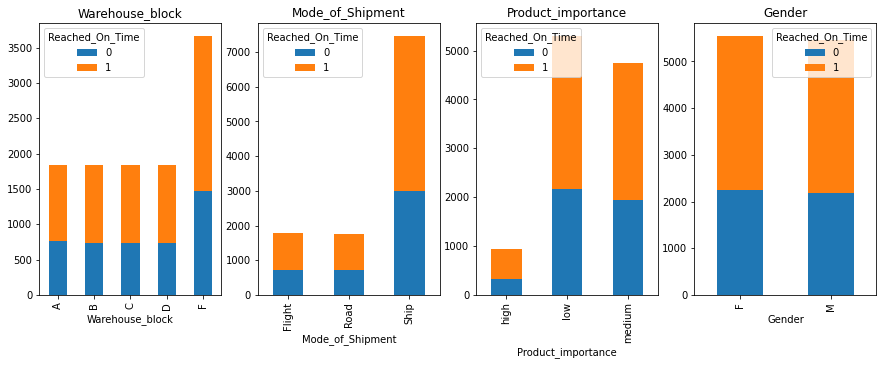

In [86]:
## YOUR CODE HERE

## YOUR CODE HERE
#Reached on time - target 
# Categorical - mode of shipment, Product_importance, Gender, warehouse_block 

cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
target_col = 'Reached_On_Time'

fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(15,5))

for i, col in enumerate(cat_cols):
    data_grouped = data_df.groupby([col, target_col]).size().unstack()
    data_grouped.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(col)

plt.show()


**1.4: Explain the distribution of the target variable and the dataset.**


In [ ]:
## YOUR CODE HERE
# For all  categorical variables - there are more that reached on time
#However for gender, the distribution is the same for female and male customers 
# Warehouse blocks A, B, C, and D have a similar distribution of 'Reached_On_Time', while block F stands out with significantly more successful deliveries.
# The distribution of delivery modes by flight and road are similar, while shipments by ship are an outlier in terms of successful deliveries.
# The majority of products in the dataset are rated as low or medium importance. 


**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [87]:
## Since dataset is balanced, we will use the random splitting strategy. 
## In case of imbalanced - the better way is to use stratified 
from sklearn.model_selection import train_test_split

X = data_df.drop('Reached_On_Time', axis=1)
y = data_df['Reached_On_Time']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**1.6: Would you drop any column? Justify your reasoning.** 

**Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**



In [ ]:
# No need for scaling since model is tree-based, invariant to the importance of scale for the data 

In [88]:
X_dev = X_dev.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)


X_dev_encoded = pd.get_dummies(X_dev, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
X_test_encoded = pd.get_dummies(X_test, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])


**1.7: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [ ]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
dt.fit(X_dev_encoded, y_dev)

y_dev_pred = dt.predict(X_dev_encoded)
y_test_pred = dt.predict(X_test_encoded)

dev_acc = accuracy_score(y_dev, y_dev_pred)
test_acc = accuracy_score(y_test, y_test_pred)

dev_f1 = f1_score(y_dev, y_dev_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Development Accuracy:', dev_acc)
print('Test Accuracy:', test_acc)

print('Development F1-score:', dev_f1)
print('Test F1-score:', test_f1)






Development Accuracy: 1.0
Test Accuracy: 0.6613636363636364
Development F1-score: 1.0
Test F1-score: 0.7151051625239004


**1.8: Visualize the trained tree until the max_depth 8.**

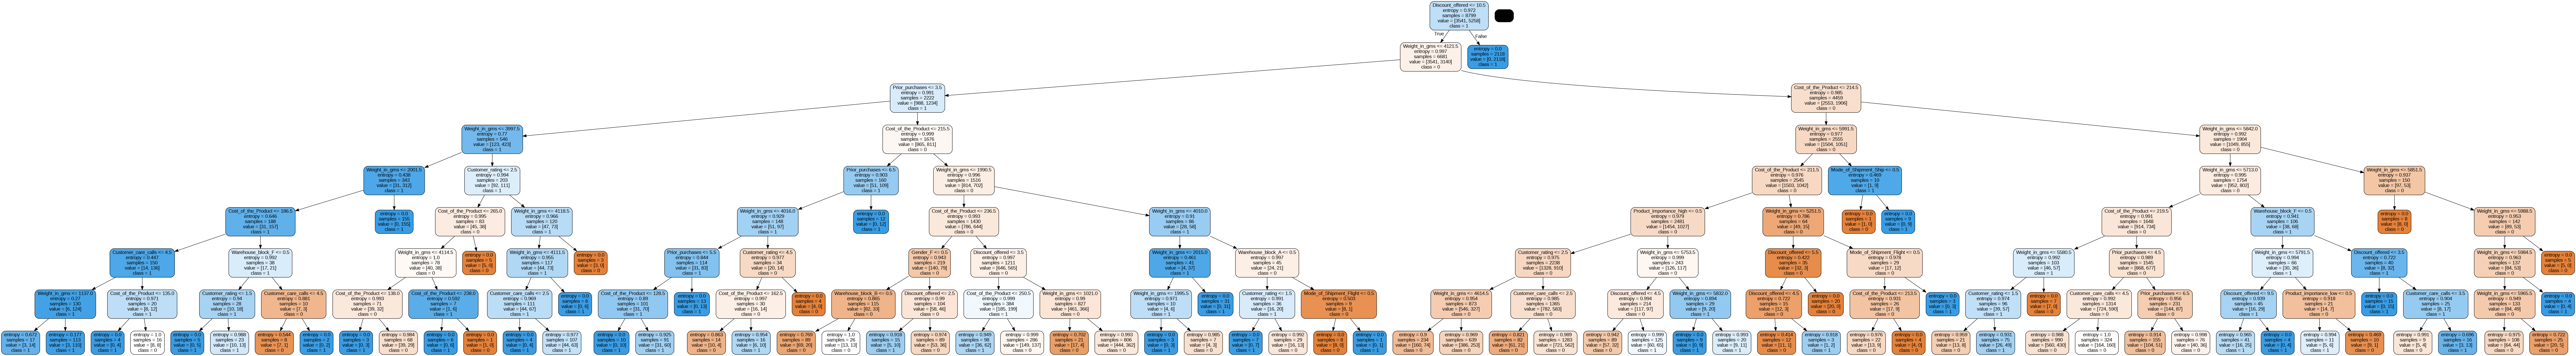

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
clf.fit(X_dev_encoded, y_dev)

dot_data = export_graphviz(clf, out_file=None, feature_names=X_dev_encoded.columns, class_names=['0', '1'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_dev_encoded, y_dev)

print("Best parameters: ", grid_search.best_params_)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42)
clf.fit(X_dev_encoded, y_dev)

y_dev_pred = clf.predict(X_dev_encoded)
y_test_pred = clf.predict(X_test_encoded)

dev_f1 = f1_score(y_dev, y_dev_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

dev_acc = accuracy_score(y_dev, y_dev_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Development set f1 score: ", dev_f1)
print("Test set f1 score: ", test_f1)
print("Development set accuracy: ", dev_acc)
print("Test set accuracy ", test_acc)


Best parameters:  {'max_depth': 5}
Development set f1 score:  0.6910331985528836
Test set f1 score:  0.6836634781953754
Development set accuracy:  0.6924650528469144
Test set accuracy  0.685


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [ ]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_dev_encoded.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Top 3 most important features:")
print(feature_importances.nlargest(3, 'Importance'))


Top 3 most important features:
            Feature  Importance
0  Discount_offered    0.839710
1     Weight_in_gms    0.092189
2   Prior_purchases    0.050721


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [113]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X_dev_encoded, y_dev)

y_dev_pred = rf.predict(X_dev_encoded)
y_test_pred = rf.predict(X_test_encoded)

dev_f1 = f1_score(y_dev, y_dev_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

dev_acc = accuracy_score(y_dev, y_dev_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Development set f1 score: ", dev_f1)
print("Test set f1 score: ", test_f1)
print("Development set accuracy: ", dev_acc)
print("Test set accuracy: ", test_acc)

Development set f1 score:  1.0
Test set f1 score:  0.6488897244678407
Development set accuracy:  1.0
Test set accuracy:  0.6527272727272727


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [114]:
#We can check the out of the bag score attribute of RandomeForestClassifier. 
# In our cases, not all trees have pure leaves
print("Out-of-bag score:", rf.oob_score_)

Out-of-bag score: 0.6490510285259689


In [53]:
def bfs(clf):
    queue = [0]
    left = clf.tree_.children_left
    right = clf.tree_.children_right
    n_nodes = clf.tree_.node_count
    impurities = clf.tree_.impurity
    leafs_impurity = []
    for i in range(n_nodes):
        if left[i] == right[i]:
            imp = impurities[i]
            leafs_impurity.append(imp)
    return leafs_impurity

trees = rf.estimators_
all_pure = True
for tree in trees:
    leaf_node_impurity = bfs(tree)
    if not all(impurity == 0.0 for impurity in leaf_node_impurity):
        all_pure = False
        break

if all_pure:
    print("All trees in the trained random forest have pure leaves")
else:
    print("Not all trees in the trained random forest have pure leaves")



All trees in the trained random forest have pure leaves


In [36]:
print("min_samples_split:", rf.min_samples_split)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_dev_encoded, y_dev, cv=5, scoring='accuracy')
print("Mean accuracy score:", scores.mean())


min_samples_split: 2
Mean accuracy score: 0.6558709752441987


In [117]:
#TO find the mean accuracy of the every tree of Random Forest - mean of all the trees
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

tree_list = rf.estimators_

tree_acc_scores = []
for tree in tree_list:
    y_test_pred = tree.predict(X_test_encoded)
    tree_acc_scores.append(accuracy_score(y_test, y_test_pred))

mean_tree_acc_score = sum(tree_acc_scores) / len(tree_acc_scores)
print("Mean accuracy score:" , mean_tree_acc_score)


Mean accuracy score: 0.6379


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [127]:
##n estimators: the estimated number of trees in the forest. Increasing the number of trees can aid in reducing overfitting and improving model accuracy. However, there is a limit beyond which increasing the number of trees will not improve the model's performance and may even degrade it due to overfitting.
#max depth: maximum depth of tree's in the forest. Limiting the maximum depth of each tree can aid in reducing overfitting and improving model accuracy. Setting the maximum depth too low, on the other hand, may cause the model to underfit and reduce its accuracy.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [ ]:
## YOUR SOLUTION HERE
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20, 30, 50]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_dev_encoded, y_dev)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 5, 'n_estimators': 1000}
Best score: 0.6773890287930393


**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20, 30, 50]
}

rf = RandomForestClassifier(oob_score=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_dev_encoded, y_dev)

print("Best hyperparameters:", grid_search.best_params_)
print("OOB error:", 1 - grid_search.best_estimator_.oob_score_)


Best hyperparameters: {'max_depth': 5, 'n_estimators': 1000}
OOB error: 0.3243550403454938


In [ ]:
rf_optimal = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
rf_optimal.fit(X_dev_encoded, y_dev)

y_dev_pred = rf_optimal.predict(X_dev_encoded)
y_test_pred = rf_optimal.predict(X_test_encoded)

dev_f1 = f1_score(y_dev, y_dev_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

dev_acc = accuracy_score(y_dev, y_dev_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Development set f1 score: ", dev_f1)
print("Test set f1 score: ", test_f1)
print("Development set accuracy: ", dev_acc)
print("Test set accuracy: ", test_acc)


Development set f1 score:  0.6956574452194042
Test set f1 score:  0.6865611490083501
Development set accuracy:  0.6958745311967269
Test set accuracy:  0.6868181818181818


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

Top 3 features: Index(['Discount_offered', 'Weight_in_gms', 'Prior_purchases'], dtype='object')


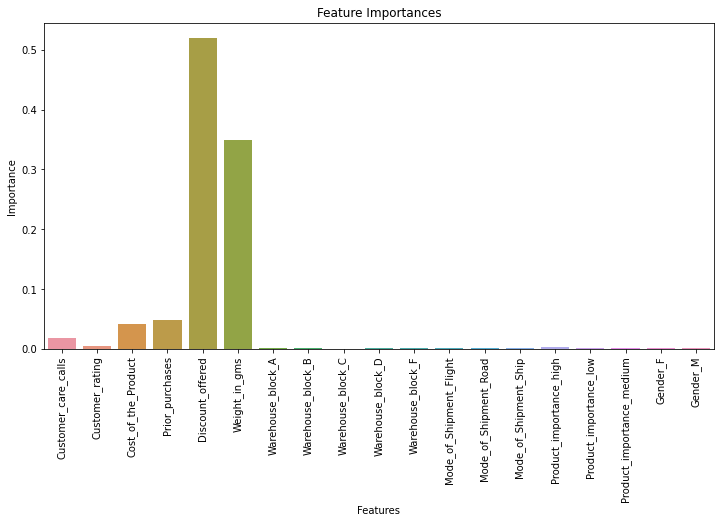

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_optimal.feature_importances_
indices = np.argsort(importances)[::-1]
top_3_features = X_dev_encoded.columns[indices][:3]
print("Top 3 features:", top_3_features)

plt.figure(figsize=(12, 6))
sns.barplot(x=X_dev_encoded.columns, y=importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [119]:
## YOUR CODE HERE

importances = rf_optimal.feature_importances_
indices = np.argsort(importances)[::-1]
top_3_features = X_dev_encoded.columns[indices][:3]
print("Top 3 features:", top_3_features)


Top 3 features: Index(['Discount_offered', 'Weight_in_gms', 'Prior_purchases'], dtype='object')


## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [108]:
## YOUR CODE HERE

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time

param_grid = {
    'max_depth': [5, 7, 10],
    'max_leaf_nodes': [15, 31, 63],
    'learning_rate': [0.1, 0.01, 0.001]
}

clf = HistGradientBoostingClassifier(random_state=42)
hgb = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')

start_time = time.time()
hgb.fit(X_dev_encoded, y_dev)
end_time = time.time()

print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))
print("Best hyperparameters:", hgb.best_params_)
print("Mean test score:", hgb.best_score_)

y_test_pred = grid_search.predict(X_test_encoded)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_auc = roc_auc_score(y_test, y_test_pred, average='macro')
print("Test set accuracy:", test_acc)
print("Test set f1 score:", test_f1)
print("Test set precision:", test_precision)
print("Test set recall:", test_recall)
print("Test set AUC score:", test_auc)

Time taken for model selection: 93.46 seconds
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 31}
Mean test score: 0.6714901157004846
Test set accuracy: 0.69
Test set f1 score: 0.6882249435006412
Test set precision: 0.7498486980572737
Test set recall: 0.7293948928701385
Test set AUC score: 0.7293948928701385


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT NEED** to choose the same hyperparameters as HistGradientBoostingClassifier.

In [103]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time

param_grid = {'max_depth': [4, 6, 8],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [50, 100, 200]}

clf = XGBClassifier(random_state=42)
hgboost = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')

start_time = time.time()
hgboost.fit(X_dev_encoded, y_dev)
end_time = time.time()

print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))
print("Best hyperparameters:", hgboost.best_params_)
print("Mean test score:", hgboost.best_score_)

y_test_pred = grid_search.predict(X_test_encoded)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_auc = roc_auc_score(y_test, y_test_pred, average='macro')
print("Test set f1 score:", test_f1)
print("Test set accuracy:", test_acc)
print("Test set precision:", test_precision)
print("Test set recall:", test_recall)
print("Test set AUC score:", test_auc)




Time taken for model selection: 195.45 seconds
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean test score: 0.6818644718425955
Test set f1 score: 0.6882249435006412
Test set accuracy: 0.69
Test set precision: 0.7498486980572737
Test set recall: 0.7293948928701385
Test set AUC score: 0.7293948928701385


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

For HistGradientBoostingClassifier:
- Mean test score: 0.6714901157004846
- Test set accuracy: 0.6777272727272727
- Test set f1 score: 0.6776041095038167
- Test set precision: 0.6956948898252681
- Test set recall: 0.698339005543783
- Test set AUC score: 0.6983390055437831

For XGBoost 
- Mean test score: 0.6818644718425955
- Test set f1 score: 0.6882249435006412
- Test set accuracy: 0.69
- Test set precision: 0.7498486980572737
- Test set recall: 0.7293948928701385
- Test set AUC score: 0.7293948928701385

In [43]:
## Comparing the results of HistGradientBoostingClassifier and XGBoost models, XGBoost outperformed the former on all evaluation metrics. 
##The mean test score for XGBoost was 0.6819, which is higher than the mean test score of 0.6715 obtained for HistGradientBoostingClassifier. 
##The f1 score, precision, recall, and AUC score of XGBoost were also higher than those of HistGradientBoostingClassifier. Specifically, the f1 score for XGBoost was 0.6882, while the f1 score for HistGradientBoostingClassifier was 0.6776. 
##The accuracy score for XGBoost was 0.69, which is also higher than the accuracy score of 0.6777 obtained for HistGradientBoostingClassifier.



**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [121]:
importances = hgboost.best_estimator_.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_dev_encoded.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

print("Top 3 important features:")
for feature, importance in feature_importances[:3]:
    print(feature, ":", importance)


Top 3 important features:
Discount_offered : 0.83
Prior_purchases : 0.07
Weight_in_gms : 0.03


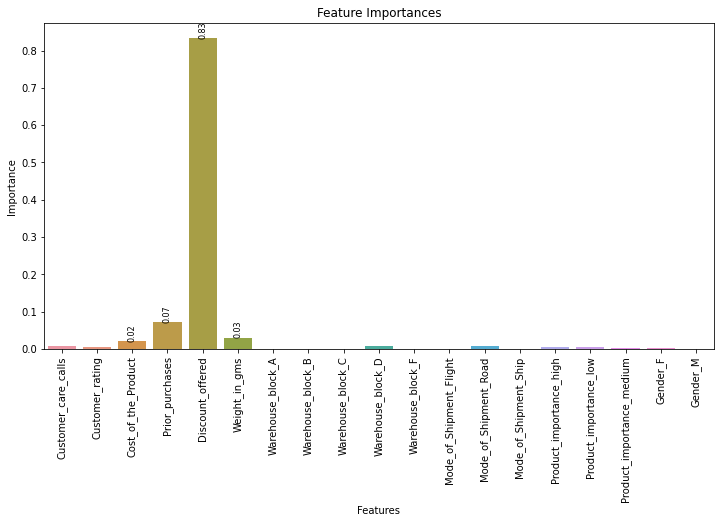

In [49]:

plt.figure(figsize=(12, 6))
sns.barplot(x=X_dev_encoded.columns, y=importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

threshold = 0.02
for index, value in enumerate(importances):
    if value >= threshold:
        plt.text(index, value, "{:.2f}".format(value), fontsize=8, ha='center', va='bottom', rotation=90)

plt.show()

In [ ]:
# In this case, most important 3 features: discount_offered, prior_purchases, weight_in_gms.
# From the observations, it is equivalent to the top 3 feature imporances that were in decision trees

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [125]:
importances = hgboost.best_estimator_.feature_importances_
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_dev_encoded.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

print("Top 5 important features:")
for feature, importance in feature_importances[:5]:
    print(feature, ":", importance)


Top 5 important features:
Discount_offered : 0.83
Prior_purchases : 0.07
Weight_in_gms : 0.03
Cost_of_the_Product : 0.02
Customer_care_calls : 0.01


In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time

top_5_features = ['Discount_offered', 'Prior_purchases', 'Weight_in_gms', 'Cost_of_the_Product', 'Customer_care_calls']

X_dev_5 = X_dev_encoded[top_5_features]
X_test_5 = X_test_encoded[top_5_features]

param_grid = {'max_depth': [6, 9, 12],
              'learning_rate': [0.1, 0.01, 0.05],
              'n_estimators': [60, 90, 120]}

clf = XGBClassifier(random_state=42)
grid_search_top5 = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

start_time = time.time()
grid_search_top5.fit(X_dev_5, y_dev)
end_time = time.time()

print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))
print("Best hyperparameters:", grid_search_top5.best_params_)
print("Mean test score:", grid_search_top5.best_score_)

y_test_pred_top5 = grid_search_top5.predict(X_test_5)
test_f1_top5 = f1_score(y_test, y_test_pred_top5, average='macro')
test_acc_top5 = accuracy_score(y_test, y_test_pred_top5)
test_precision_top5 = precision_score(y_test, y_test_pred_top5, average='macro')
test_recall_top5 = recall_score(y_test, y_test_pred_top5, average='macro')
test_auc_top5 = roc_auc_score(y_test, y_test_pred_top5, average='macro')

print("Test set f1 score (top 5 features):", test_f1_top5)
print("Test set accuracy (top 5 features):", test_acc_top5)
print("Test set precision (top 5 features):", test_precision_top5)
print("Test set recall (top 5 features):", test_recall_top5)
print("Test set AUC score (top 5 features):", test_auc_top5)


Time taken for model selection: 114.44 seconds
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 120}
Mean test score: 0.679055765155822
Test set f1 score (top 5 features): 0.6847219125736892
Test set accuracy (top 5 features): 0.6859090909090909
Test set precision (top 5 features): 0.737390350877193
Test set recall (top 5 features): 0.7224362678995697
Test set AUC score (top 5 features): 0.7224362678995698


In [102]:
## The XGBoost model with the top five features performs slightly worse than the original XGBoost model. 
#3The top 5 feature model's mean test score is slightly lower (0.679 vs 0.682), as is the test set f1 score (0.685 vs 0.688). 
##However, the performance differences are not significant, and the top 5 feature model still performs reasonably well.

## Question 4: Calibration

**4.1: Estimate the brier score for the HistGradientBoosting model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [109]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss

y_test_pred_prob = hgb.best_estimator_.predict_proba(X_test_encoded)[:,1]
brier_score = brier_score_loss(y_test, y_test_pred_prob)

print("Brier score:", brier_score)


Brier score: 0.17972872519835603


**4.2: Calibrate the trained HistGradientBoosting model using Platt Scaling. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

Brier score after calibration: 0.1786598028087309


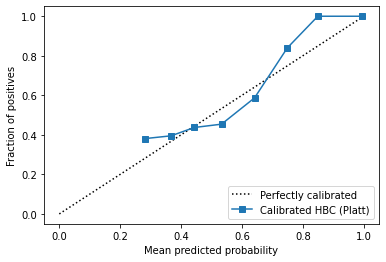

In [111]:
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

cal_hbc = CalibratedClassifierCV(hgb, cv='prefit', method='sigmoid')
cal_hbc.fit(X_test_encoded, y_test)

# brief score - after calibration 
y_calibrated_pred = cal_hbc.predict_proba(X_test_encoded)[:, 1]
calibrated_brier_score = brier_score_loss(y_test, y_calibrated_pred)
print("Brier score after calibration:", calibrated_brier_score)

display_platt = CalibrationDisplay.from_estimator(cal_hbc, X_test_encoded, y_test, n_bins=10, name='Calibrated HBC (Platt)')


**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
## YOUR CODE HERE - Brier score after calibration is higher than bried score(without), therefore it helps.